In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()
print(iris.feature_names)
target_names = iris.target_names
print(target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target)

In [4]:
print(f"Length of training data: {len(X_train)}")
print(f"Length of test data: {len(X_test)}")

Length of training data: 112
Length of test data: 38


In [5]:
cls = tree.DecisionTreeClassifier()
cls.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
cls_report = classification_report(Y_test, cls.predict(X_test))
print(cls_report)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       0.92      1.00      0.96        11
          2       1.00      0.88      0.93         8

avg / total       0.98      0.97      0.97        38



In [7]:
conf_mat = confusion_matrix(Y_test, cls.predict(X_test))
conf_sum = np.sum(conf_mat, axis=1, keepdims=True)
conf_mat = conf_mat/conf_sum
print(conf_mat)

[[1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    0.125 0.875]]


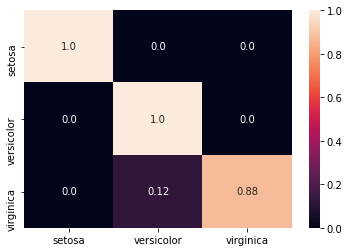

In [8]:
plt = sns.heatmap(conf_mat, fmt = '.2', annot=True, xticklabels = iris.target_names, yticklabels = iris.target_names)

# Visualize a Decision Tree

In [9]:
import graphviz 

In [10]:
import graphviz

In [11]:
dot_data = tree.export_graphviz(cls, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH